In [1]:
import numpy as np
from numpy.fft import fft
import pandas as pd
import matplotlib.pyplot as plt

# Time Series Analysis

This notebook generates synthetic time series to assist in the preparation of undergraduate level lectures and assignments. It is divided into the following steps:

1. Definition of the periodic functions that will form the time signal
2. First order statistics
3. Frequency analysis

## 1. Definition of sinus functions

Here we choose the frequency and amplitude values of the sinusoidal waves that will form the time series. For this, we use a function called __sinus_signal__ which takes the following parameters as input:

* _A_: Amplitude
* _freq_: Frequency (Hz)
* _c_: Offset
* _t_: time array


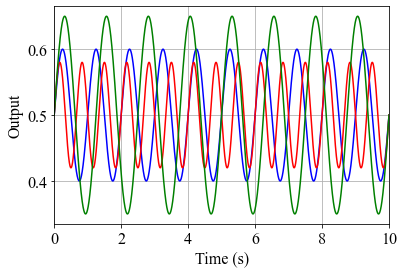

In [2]:
def sinus_signal(A, freq, c, t):
    return A*np.sin(2*np.pi*freq*t) +c

# Sampling Frequency (Hz)
sampling = 5e3
# Time array
t = np.arange(0, 50, 1/sampling)

# Amplitude (V)
A1 = 0.1
A2 = 0.08
A3 = 0.15
# Frequency (Hz)
freq1 = 1
freq2 = 1.5
freq3 = 0.8
# Offset
c = 0.5

signal1 = sinus_signal(A1, freq1, c, t)
signal2 = sinus_signal(A2, freq2, c, t)
signal3 = sinus_signal(A3, freq3, c, t)

plt.rcParams['font.size'] = 16
plt.rcParams["font.family"] = "Times New Roman"
plt.figure()
plt.plot(t, signal1, 'b')
plt.plot(t, signal2, 'r')
plt.plot(t, signal3, 'g')
plt.xlim([0, 10])
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()
plt.show()

According to Fourier's Theorem _a periodic function f(x) which is reasonably continuous may be expressed as the sum of a series of sine or cosine terms_. 

So that's what we're going to do here. The time series _signal_ will be formed by the sum of the sine functions declared earlier.

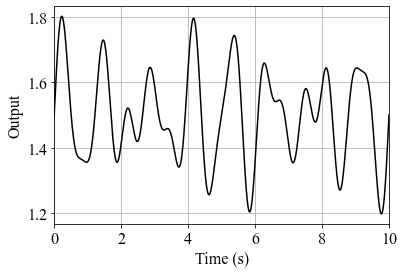

In [3]:
signal = signal1 + signal2 + signal3

plt.figure()
plt.plot(t, signal, 'k')
plt.xlim([0, 10])
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid()
plt.show()

## 2. First order statistics

In real time series, we often observe noise from many different sources (power grid, vibrations, or disturbances during measurements). To make our signal more realistic, we will add a variable that simulates white noise.

The variable _noise_ is an array with the same dimension as the time series _signal_, but made up of random values comprised in a normal distribution. The mean value and the standard deviation of this distribution are given by the variables _noise_mean_ and _noise_std_.

In [4]:
noise_mean = np.mean(signal)
noise_std = 0.5
noise = np.random.normal(noise_mean, noise_std, len(signal))

signal = signal + noise

When analyzing a stationary or periodic time series, the mean is naturally one of the first metrics we look for. In addition, it is also useful to quantify how much the samples fluctuate around it. To do this, the standard deviation of the signal is employed. 

The mean $\bar u$ and standard deviation $\sigma$ of a time series $u(t)$ with duration $T$ can be defined as:

$$\bar u = \frac{1}{n} \sum_{t = t_{0}}^{T} u_{t} $$

$$\sigma = \sqrt{\frac{1}{N}\sum_{t = t_{0}}^{T} (u_{t} - \bar u)^{2}} $$

Periodic signals are charecterized by their oscillation around the average value. Because of this, the root-mean-square (RMS) becomes an useful metric to describe this type of time series. The RMS is defined as: 

$$u_{RMS}=\sqrt{\frac{1}{n}\sum u^{2}}$$

The implementation of this formula is simple using _numpy_. In addition, the library already has built-in functions for calculating the mean and standard deviation. Below, we will calculate these metrics and visualize what they represent with respect to the signal created previously.

Mean: 3.000098396657572
Standard deviation: 0.5196731970539578
RMS: 3.044774313699395


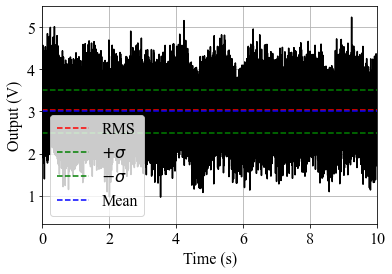

In [5]:
mean = np.mean(signal)
sigma = np.std(signal)
rms = np.sqrt(np.mean(signal**2))

print('Mean:', mean)
print('Standard deviation:', sigma)
print('RMS:', rms)

plt.figure()
plt.plot(t, signal, 'k')
plt.axhline(rms, color = 'r', linestyle = '--',label='RMS')
plt.axhline(mean+sigma, color = 'g', linestyle = '--',label='$+\sigma$')
plt.axhline(mean-sigma, color = 'g', linestyle = '--',label='$-\sigma$')
plt.axhline(mean, color = 'b', linestyle = '--',label='Mean')
plt.legend()
plt.xlim([0, 10])
plt.xlabel('Time (s)')
plt.ylabel('Output (V)')
plt.grid()
plt.show()


Many physical phenomena can be described as Normal (or Gaussian) distributions. This distribution is characterized by its symmetry relative to the mean value of the measured samples. Because of its shape, it is also known as the bell curve. The standard deviation of the time series will cause the curve to be more open or narrow. 

The general form of a Normal distribution takes two parameters, the mean $\mu$ and the standard deviation $\sigma$:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^{2}} $$

This formula is implemented in the function _normal_distribution_ which, in addition to the mean and standard deviation, has as input the parameter _bins_. This in turn is generated to represent the histogram of the time series along with the Normal distribution that fits our signal.

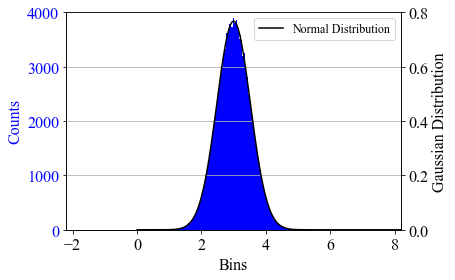

In [12]:
def normal_distribution(sigma, mu, bins):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((bins - mu)/sigma)**2)

bins = np.arange(0, 100, 0.02)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(signal, bins=bins, color='b')
ax2.plot(bins, normal_distribution(sigma, mean, bins), 'k', label='Normal Distribution')
plt.legend(prop={'size': 12})
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts', color='b')
ax2.set_ylabel('Gaussian Distribution', color='k')
ax1.tick_params(axis="y", labelcolor='b')
ax2.tick_params(axis="y", labelcolor='k')
plt.xlim([mean-10*sigma, mean+10*sigma])
ax1.set_ylim(0, 4000)
ax2.set_ylim(0, 0.8)
plt.grid()
plt.show()


## 3. Fourier Transform

The main idea behind the Fourier Transform is to represent a given time-dependent function in a form that makes it possible to identify its dominant frequencies. 

Before doing the frequency analysis of a time series, it is common to subtract its mean value so we can keep only the variable component of the series. An important remark is that, when the signal is centered at zero, the calculation of the RMS is equivalent to that of the standard deviation. To illustrate this, we will plot the time series once again after subtracting its mean. In cases like this, the higher the RMS, the higher the oscillation of the signal around its average value.


Mean: 8.631104719825089e-16
Standard deviation: 0.5196731970539576
RMS: 0.5196731970539578


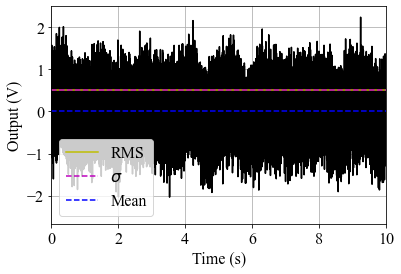

In [13]:
signal = signal - np.mean(signal)

rms = np.sqrt(np.mean(signal**2))

print('Mean:', np.mean(signal))
print('Standard deviation:', np.std(signal))
print('RMS:', rms)

plt.figure()
plt.plot(t, signal, 'k')
plt.axhline(rms, color = 'y', linestyle = '-',label='RMS')
plt.axhline(np.std(signal), color = 'm', linestyle = '--',label='$\sigma$')
plt.axhline(np.mean(signal), color = 'b', linestyle = '--',label='Mean')
plt.legend()
plt.xlim([0, 10])
plt.xlabel('Time (s)')
plt.ylabel('Output (V)')
plt.grid()
plt.show()


For applications in fields such as fluid mechanics, it is useful to describe time series as an infinite sum of sines and cosines with increasing frequencies. Therefore, a function defined on the interval between $[0,L)$ can be written as:

$$f(x) = \sum \limits_{k=1}^{L} [A_{k}\cos(\frac{2\pi k}{L} x) + B_{k}\sin(\frac{2\pi k}{L} x)]$$

To solve the problem, we must compute the $A_{k}$ and $B_{k}$ coefficients. The most efficient method to find these trigonometric functions that approximate $f(x)$ is called Fast Fourier Transform (FFT). By using this technique, we can represent the signal in the frequency domain. 

We should expect to see the frequencies chosen for the sine functions to stand out in the spectrum that will be formed.


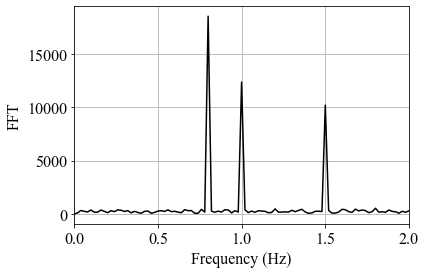

In [14]:
X = fft(signal)
N = len(X)
n = np.arange(N)
T = N/sampling
freq = n/T 

plt.figure()
plt.plot(freq, np.abs(X), 'k')
plt.xlim([0, 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT')
plt.grid()
plt.show()


The purpose of this notebook is to provide support material for students taking their first steps in the area of signal processing. To this end, functions that facilitate statistical analysis of time series are presented and basic concepts are explained. 

This notebook is also useful for course design as it allows the customization of practical examples and the generation of synthetic time series for assignments. The lines of code below are for saving the resulting signal as a CSV file. Modification of the sine wave parameters at the beginning of the notebook is encouraged as only minor adaptations in the rest of the code may be necessary.

In [ ]:
df_signal = pd.DataFrame(np.transpose([t, signal]))
df_signal.head()
df_signal.to_csv('example.csv', header  = ['Time (s)', 'Output (V)'], index=False)